# Fashion Product generation using Generator and Discriminator as Multi-layer Perceptrons

In [1]:
import torch
from torch import nn
from torchvision.datasets import FashionMNIST
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt
from tqdm.auto import tqdm
from google.colab import drive
from PIL import Image
import numpy as np

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


<h3>Set device</h3>

In [3]:
device = 'cuda'

<h3>Generator</h3>

In [10]:
class Generator(nn.Module):
    
    """
    Multi-layer Perceptron as the generator of GAN.
    
    Parameters
    ----------
    noise_dim: int
        dimension of the random noise vector drawn from latent space.
    hidden_dims: tuple
        tuple of dimensions of hidden layers.
    image_dim: int
        dimension of the flattened image generated.
    """
    
    def __init__(self, noise_dim = 64, hidden_dims = (), image_dim = 784):
        
        super(Generator, self).__init__()
        
        self.noise_dim = noise_dim
        self.hidden_dims = hidden_dims
        
        
        layers_list = [] # list of hidden layers and output layer in MLP.
        
        curr_input_dim = noise_dim # initial input dimension.
        
        for hidden_dim in hidden_dims: # add hidden layers to the list
            layer = nn.Sequential(nn.Linear(curr_input_dim, hidden_dim),
                                  nn.BatchNorm1d(hidden_dim),
                                  nn.ReLU())
            layers_list.append(layer)
            curr_input_dim = hidden_dim
            
        layer = nn.Sequential(nn.Linear(hidden_dim,image_dim), nn.Tanh()) # add output layer to the list
        layers_list.append(layer)
        
        self.generator = nn.Sequential(*layers_list) # build generator
    
    def forward(self, noise_vectors):
        
        """
        Perform the forward pass.

        Parameters
        ----------
        noise_vectors: Tensor
            batch of random noise vectors.

        Returns
        -------
        images: Tensor
            images generated from the noise vectors.
        """
        
        images = self.generator(noise_vectors)
        return images

<h3>Discriminator</h3>

In [11]:
class Discriminator(nn.Module):
    
    """
    Multi-layer Perceptron as the discriminator of GAN.

    image_dim: int
        dimension of a flattened image.
    hidden_dims: tuple
        tuple of dimensions of hidden layers.
    """
    
    def __init__(self, image_dim = 784, hidden_dims = ()):
        
        super(Discriminator, self).__init__()
        
        layers_list = []
        
        curr_input_dim = image_dim
        
        for hidden_dim in hidden_dims:
            layer = nn.Sequential(nn.Linear(curr_input_dim, hidden_dim), nn.LeakyReLU(negative_slope = 0.2))
            layers_list.append(layer)
            curr_input_dim = hidden_dim
            
        layer = nn.Sequential(nn.Linear(hidden_dim,1)) # add output layer to the list
        layers_list.append(layer)
        
        self.discriminator = nn.Sequential(*layers_list)
    
    def forward(self, images):
        
        """
        Perform the forward pass.

        Parameters
        ----------
        images:
            batch of images.

        Returns
        -------
        predictions: Tensor
            binary predictions of the input images.
        """
        
        predictions = self.discriminator(images)
        return predictions

<h3>function to show generated images</h3>

In [17]:
def show_images(images, image_size = (28,28)):
    
    """
    Show the grid of images.

    Parameters
    ----------
    images: Tensor
        batch of images to be displayed.
    image_size: tuple
        size of an image.

    Returns
    -------
    None
    """

    images = (images + 1) / 2
    images = images.detach().cpu().view(-1, *image_size)
    image_grid = make_grid(images, nrow = 5).permute(1,2,0)
    plt.imshow(image_grid)
    plt.show()

<h3>set input and image dimensions</h3>

In [18]:
noise_dim = 64
image_dim = 784

<h3>create generator</h3>

In [23]:
gen = Generator(noise_dim = noise_dim, hidden_dims = (128,256,512), image_dim = image_dim).to(device)

<h3>create discriminator</h3>

In [24]:
disc = Discriminator(image_dim = image_dim, hidden_dims = (256, 128)).to(device)

<h3>train GAN</h3>

  0%|          | 0/469 [00:00<?, ?it/s]

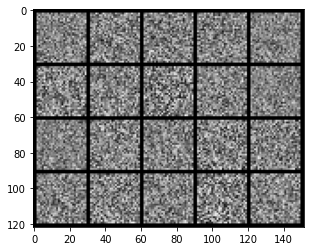

Epoch 1 : Generator's loss : 4.152019355215752, Discriminator's loss : 0.5292007059875582


  0%|          | 0/469 [00:00<?, ?it/s]

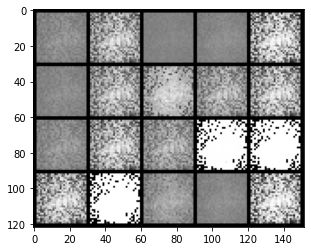

Epoch 2 : Generator's loss : 8.382946593420845, Discriminator's loss : 0.4322285378284292


  0%|          | 0/469 [00:00<?, ?it/s]

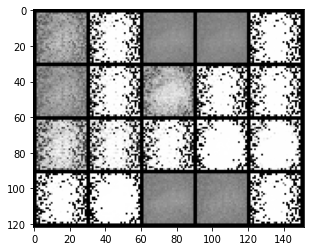

Epoch 3 : Generator's loss : 7.758697744117363, Discriminator's loss : 0.22032695668719726


  0%|          | 0/469 [00:00<?, ?it/s]

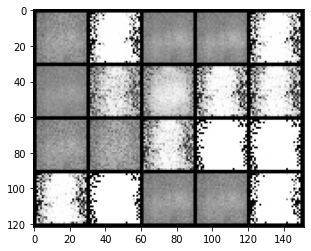

Epoch 4 : Generator's loss : 5.743856891640214, Discriminator's loss : 0.3346453600410205


  0%|          | 0/469 [00:00<?, ?it/s]

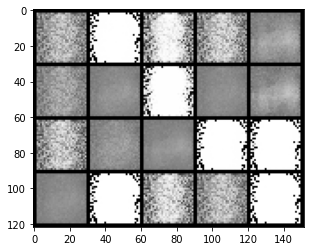

Epoch 5 : Generator's loss : 4.9126141559340555, Discriminator's loss : 0.37191183382132925


  0%|          | 0/469 [00:00<?, ?it/s]

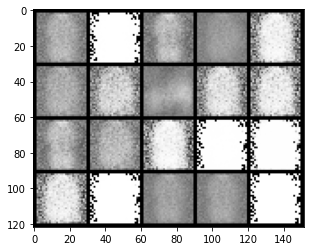

Epoch 6 : Generator's loss : 5.619932910780917, Discriminator's loss : 0.5066075930590315


  0%|          | 0/469 [00:00<?, ?it/s]

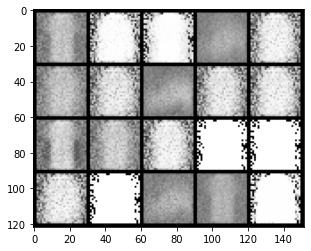

Epoch 7 : Generator's loss : 6.3263792371444865, Discriminator's loss : 0.4737552656992666


  0%|          | 0/469 [00:00<?, ?it/s]

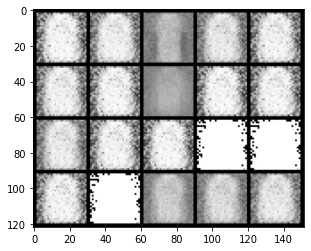

Epoch 8 : Generator's loss : 4.674830332747908, Discriminator's loss : 0.5585470475685368


  0%|          | 0/469 [00:00<?, ?it/s]

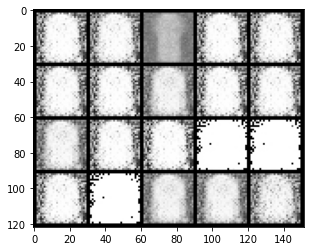

Epoch 9 : Generator's loss : 3.6579375691505382, Discriminator's loss : 1.0228334399682881


  0%|          | 0/469 [00:00<?, ?it/s]

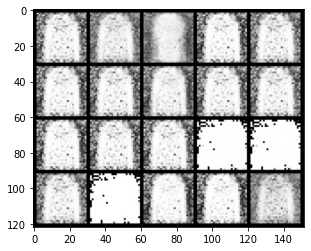

Epoch 10 : Generator's loss : 2.8572082635182054, Discriminator's loss : 0.7456352481328602


  0%|          | 0/469 [00:00<?, ?it/s]

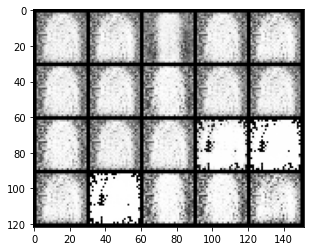

Epoch 11 : Generator's loss : 2.250558325985093, Discriminator's loss : 0.9008231286301034


  0%|          | 0/469 [00:00<?, ?it/s]

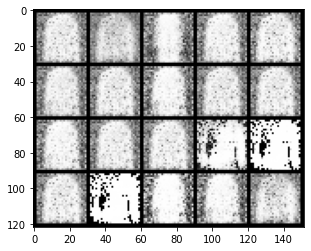

Epoch 12 : Generator's loss : 2.4205383943088017, Discriminator's loss : 0.831338264286391


  0%|          | 0/469 [00:00<?, ?it/s]

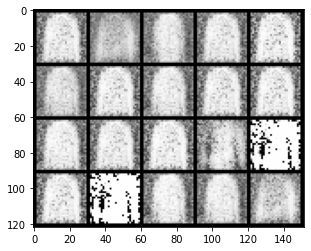

Epoch 13 : Generator's loss : 2.538651609344523, Discriminator's loss : 0.7410395914303468


  0%|          | 0/469 [00:00<?, ?it/s]

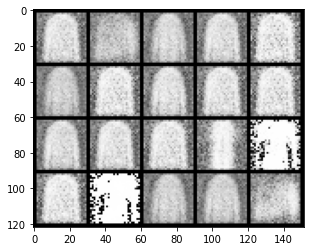

Epoch 14 : Generator's loss : 2.4299205494587865, Discriminator's loss : 0.75106253571856


  0%|          | 0/469 [00:00<?, ?it/s]

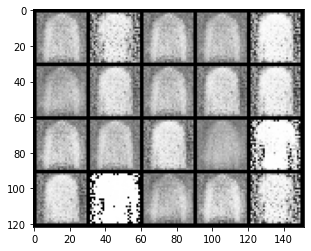

Epoch 15 : Generator's loss : 2.754629389563603, Discriminator's loss : 0.705634099079856


  0%|          | 0/469 [00:00<?, ?it/s]

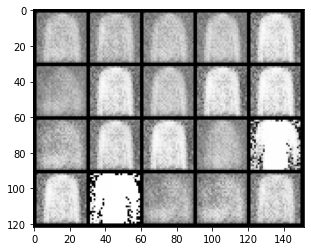

Epoch 16 : Generator's loss : 2.532874168109284, Discriminator's loss : 0.6680805661530891


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 17 : Generator's loss : 2.687773049004805, Discriminator's loss : 0.6273433652513826


  0%|          | 0/469 [00:00<?, ?it/s]

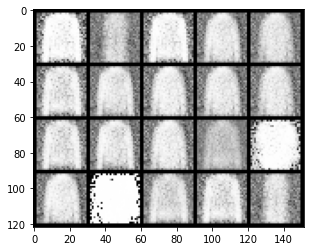

Epoch 18 : Generator's loss : 2.9640273216690844, Discriminator's loss : 0.6375371461738147


  0%|          | 0/469 [00:00<?, ?it/s]

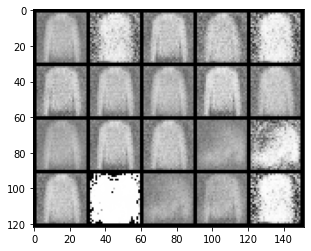

Epoch 19 : Generator's loss : 2.4562158243996755, Discriminator's loss : 0.6748269824966439


  0%|          | 0/469 [00:00<?, ?it/s]

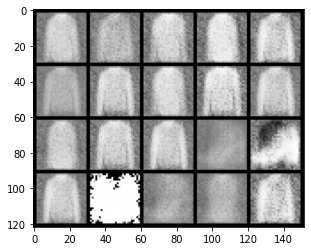

Epoch 20 : Generator's loss : 2.4760240548963486, Discriminator's loss : 0.7694793276186945


  0%|          | 0/469 [00:00<?, ?it/s]

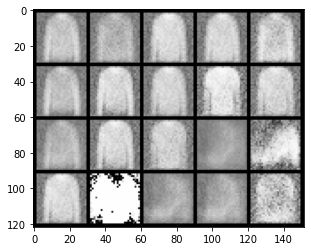

Epoch 21 : Generator's loss : 2.0924508806739026, Discriminator's loss : 0.7693819418263588


  0%|          | 0/469 [00:00<?, ?it/s]

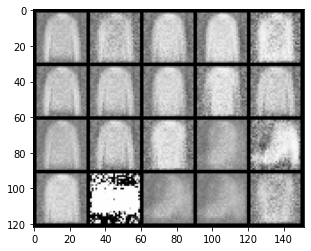

Epoch 22 : Generator's loss : 2.1562503149260337, Discriminator's loss : 0.8781087568828038


  0%|          | 0/469 [00:00<?, ?it/s]

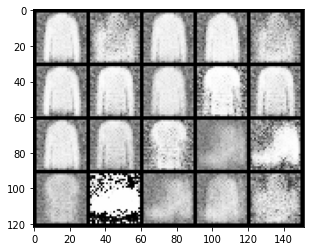

Epoch 23 : Generator's loss : 1.77910610836452, Discriminator's loss : 0.9760120627976684


  0%|          | 0/469 [00:00<?, ?it/s]

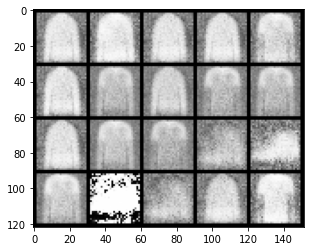

Epoch 24 : Generator's loss : 1.7184291956012945, Discriminator's loss : 0.9678718121067039


  0%|          | 0/469 [00:00<?, ?it/s]

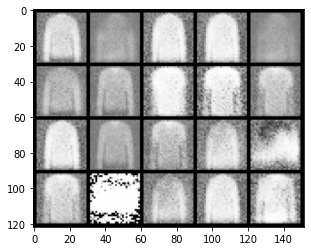

Epoch 25 : Generator's loss : 1.8450174125781191, Discriminator's loss : 0.8936867255137674


  0%|          | 0/469 [00:00<?, ?it/s]

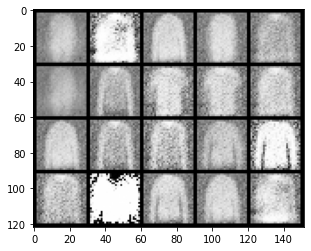

Epoch 26 : Generator's loss : 1.7910987722085738, Discriminator's loss : 1.0164688319158453


  0%|          | 0/469 [00:00<?, ?it/s]

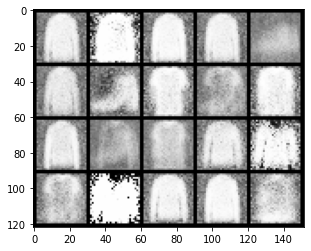

Epoch 27 : Generator's loss : 1.5026355937345703, Discriminator's loss : 1.0136665085485494


  0%|          | 0/469 [00:00<?, ?it/s]

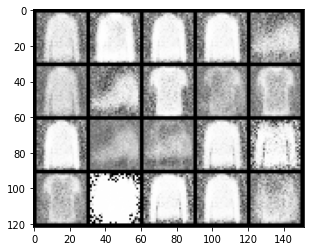

Epoch 28 : Generator's loss : 1.6216480520996712, Discriminator's loss : 0.9411363751649349


  0%|          | 0/469 [00:00<?, ?it/s]

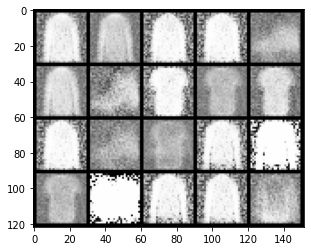

Epoch 29 : Generator's loss : 1.7373264172692289, Discriminator's loss : 0.9020060842225293


  0%|          | 0/469 [00:00<?, ?it/s]

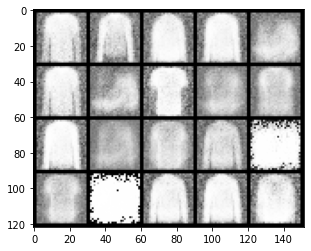

Epoch 30 : Generator's loss : 1.7126850230353219, Discriminator's loss : 0.8596116196372108


  0%|          | 0/469 [00:00<?, ?it/s]

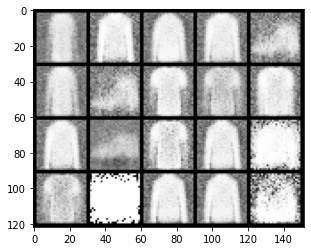

Epoch 31 : Generator's loss : 1.695493336425407, Discriminator's loss : 0.8908554670144754


  0%|          | 0/469 [00:00<?, ?it/s]

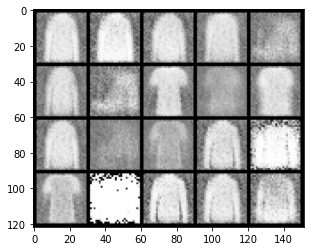

Epoch 32 : Generator's loss : 1.7127060221710693, Discriminator's loss : 0.8833128870931516


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 33 : Generator's loss : 1.7086274870423113, Discriminator's loss : 0.9646360189167421


  0%|          | 0/469 [00:00<?, ?it/s]

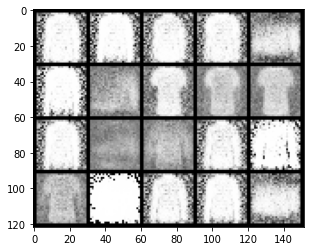

Epoch 34 : Generator's loss : 1.71738251363799, Discriminator's loss : 0.9135114366311763


  0%|          | 0/469 [00:00<?, ?it/s]

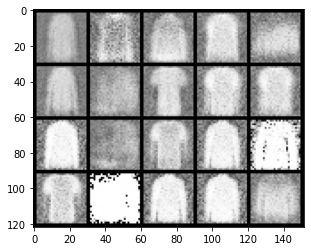

Epoch 35 : Generator's loss : 1.6434369437984313, Discriminator's loss : 0.9443258954517877


  0%|          | 0/469 [00:00<?, ?it/s]

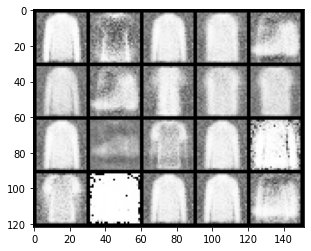

Epoch 36 : Generator's loss : 1.4973339217303911, Discriminator's loss : 1.0447870819553384


  0%|          | 0/469 [00:00<?, ?it/s]

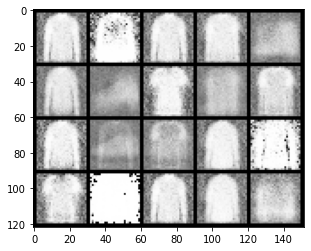

Epoch 37 : Generator's loss : 1.3752736309443965, Discriminator's loss : 1.0258846088513127


  0%|          | 0/469 [00:00<?, ?it/s]

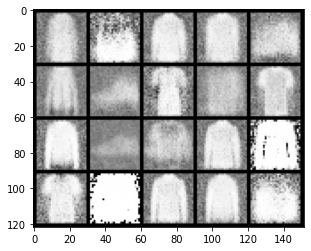

Epoch 38 : Generator's loss : 1.5051974994795663, Discriminator's loss : 0.9992358337587385


  0%|          | 0/469 [00:00<?, ?it/s]

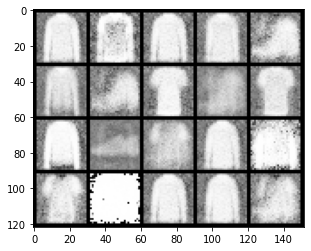

Epoch 39 : Generator's loss : 1.4510087628862751, Discriminator's loss : 0.991891437883316


  0%|          | 0/469 [00:00<?, ?it/s]

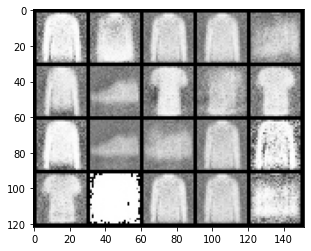

Epoch 40 : Generator's loss : 1.5497792070862582, Discriminator's loss : 0.9828655588855622


  0%|          | 0/469 [00:00<?, ?it/s]

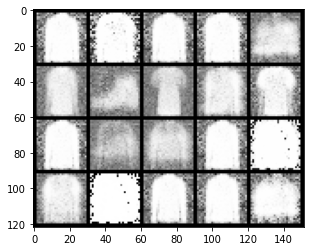

Epoch 41 : Generator's loss : 1.5353945758042813, Discriminator's loss : 1.0414654907387202


  0%|          | 0/469 [00:00<?, ?it/s]

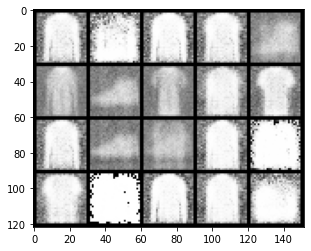

Epoch 42 : Generator's loss : 1.4765797928452238, Discriminator's loss : 1.0430056944584796


  0%|          | 0/469 [00:00<?, ?it/s]

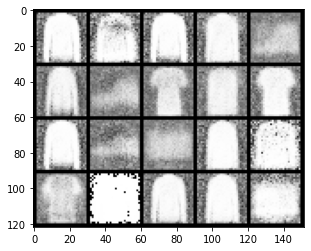

Epoch 43 : Generator's loss : 1.32754369229396, Discriminator's loss : 1.0630907756941659


  0%|          | 0/469 [00:00<?, ?it/s]

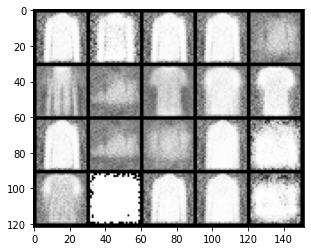

Epoch 44 : Generator's loss : 1.3501252112612288, Discriminator's loss : 1.0735486407778156


  0%|          | 0/469 [00:00<?, ?it/s]

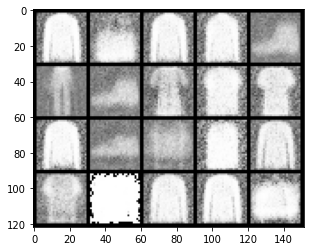

Epoch 45 : Generator's loss : 1.351563285408752, Discriminator's loss : 1.0269645949416577


  0%|          | 0/469 [00:00<?, ?it/s]

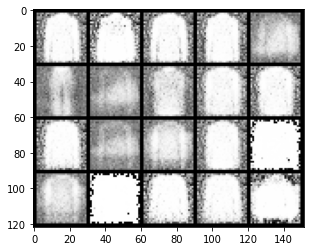

Epoch 46 : Generator's loss : 1.4378321342376759, Discriminator's loss : 0.9827913034445187


  0%|          | 0/469 [00:00<?, ?it/s]

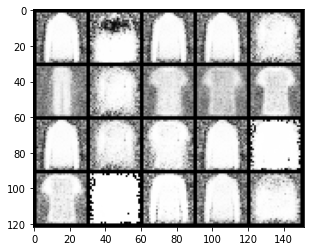

Epoch 47 : Generator's loss : 1.6559450232398027, Discriminator's loss : 1.0152354375131603


  0%|          | 0/469 [00:00<?, ?it/s]

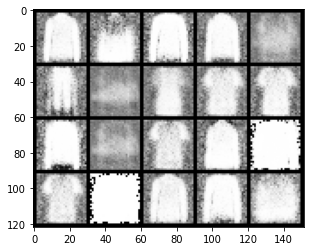

Epoch 48 : Generator's loss : 1.4902610680950221, Discriminator's loss : 0.9447419506146201


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch 49 : Generator's loss : 1.418847178218207, Discriminator's loss : 0.9819268471142376


  0%|          | 0/469 [00:00<?, ?it/s]

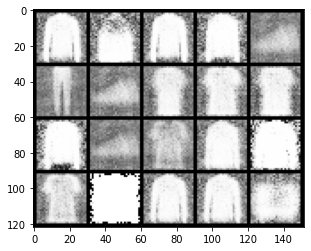

Epoch 50 : Generator's loss : 1.4944622952546647, Discriminator's loss : 0.9962012220039043


In [25]:
num_epochs = 50
lr = 0.0002

gen_optim = torch.optim.Adam(gen.parameters(), lr = lr)
disc_optim = torch.optim.Adam(disc.parameters(), lr = lr)

dataset = FashionMNIST(root = '.', download = True, transform = ToTensor())
data_loader = DataLoader(dataset,batch_size = 128, shuffle = True)

criterion = nn.BCEWithLogitsLoss()

curr_step = 0

noise_for_gif = torch.randn((20, noise_dim), device = device)
images_for_gif = []

for epoch in range(num_epochs):

  mean_gen_loss = 0
  mean_disc_loss = 0
  counter = 0

  for real_images,labels in tqdm(data_loader):

    real_images = real_images.view(len(real_images), -1).to(device)
    curr_batch_size = real_images.shape[0]

    # train discriminator
    disc_optim.zero_grad()
    noise = torch.randn((curr_batch_size,noise_dim), device = device)
    fake_images = gen(noise)
    fake_pred = disc(fake_images.detach())
    real_pred = disc(real_images)
    disc_loss = criterion(fake_pred, torch.zeros_like(fake_pred)) + criterion(real_pred, torch.ones_like(real_pred))
    disc_loss.backward(retain_graph = True)
    disc_optim.step()

    # train generator
    gen_optim.zero_grad()
    noise = torch.randn((curr_batch_size, noise_dim), device = device)
    fake_images = gen(noise)
    fake_pred = disc(fake_images)
    gen_loss = criterion(fake_pred, torch.ones_like(fake_pred))
    gen_loss.backward(retain_graph = True)
    gen_optim.step()

    mean_gen_loss += gen_loss.item()
    mean_disc_loss += disc_loss.item()
    counter += 1

    if (curr_step % 500) == 0:
        fake_images = gen(noise_for_gif)
        show_images(fake_images, (1,28,28))
        images = (fake_images + 1) / 2
        images = images.detach().cpu()
        image_grid = make_grid(images.view(20, 1,28,28), nrow = 5).permute(1,2,0)
        image_grid_arr = (255 * image_grid.numpy()).astype(np.uint8)
        images_for_gif.append(Image.fromarray(image_grid_arr))
    curr_step += 1
  
  mean_gen_loss /= counter
  mean_disc_loss /= counter
  
  # print current losses
  print(f"Epoch {epoch+1} : Generator's loss : {mean_gen_loss}, Discriminator's loss : {mean_disc_loss}")


<h3>generate images using trained GAN</h3>

In [26]:
num_images = 20

noise_vectors = torch.randn(num_images, noise_dim, device = device)

fake_images = gen(noise_vectors)

<h3>show fake images</h3>

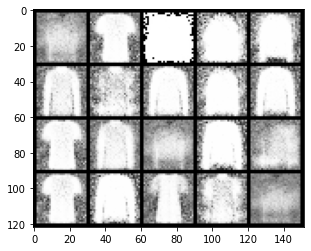

In [27]:
show_images(fake_images, (1,28,28))

<h3>show real images</h3>

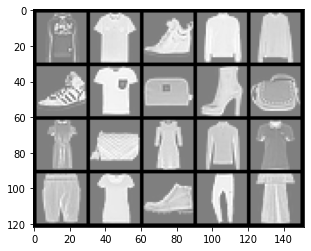

In [28]:
real_images = real_images[:20].view(-1, 28, 28)

show_images(real_images, (1, 28, 28))

<h3>save training GIF</h3>

In [29]:
images_for_gif[0].save(f'/content/gdrive/My Drive/images_for_gif/fashion_mlp.gif', save_all = True, append_images=images_for_gif[1:], optimize=False, duration=300, loop=0)